In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator


from model import mobilenet_v3_large_CA,mobilenet_v3_small_CA

2022-12-27 14:25:35.029728: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import splitfolders
splitfolders.ratio('plantvillage dataset/color', output="output", seed=3407, ratio=(0.7, 0.1, 0.2), group_prefix=None) # default values

Copying files: 54305 files [00:11, 4793.39 files/s]


In [3]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./output/train', # this is where you specify the path to the main data folder  
                                                 target_size=(224,224),
                                                  color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 48443 images belonging to 38 classes.


In [4]:
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

val_generator=train_datagen.flow_from_directory('./output/val', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 9864 images belonging to 38 classes.


In [5]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('./output/test', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 18953 images belonging to 38 classes.


In [6]:
model = mobilenet_v3_large_CA(num_classes=38)

2022-12-27 14:25:52.821312: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-27 14:25:52.846546: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:3f:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-12-27 14:25:52.846591: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-27 14:25:52.850361: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-12-27 14:25:52.850459: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-12-27 14:25:52.851603: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcu

The following Variables were used a Lambda layer's call (tf.nn.convolution), but
are not present in its tracked objects:
  <tf.Variable 'name1/kernel:0' shape=(1, 1, 72, 36) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.nn.bias_add), but
are not present in its tracked objects:
  <tf.Variable 'name1/bias:0' shape=(36,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm), but
are not present in its tracked objects:
  <tf.Variable 'batch_normalization/gamma:0' shape=(36,) dtype=float32>
  <tf.Variable 'batch_normalizatio

In [7]:
model.summary()

Model: "MobilenetV3largeCA"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         input_1[0][0]                    
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
__________________________________________________________________________________________________
Conv/HardSwish (HardSwish)      (None, 112, 112, 16) 0           Conv/BatchNorm[0][0]             
_________________________________________________________________________________

In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
accident_model=model.fit_generator(generator=train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=30)

/root/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-27 14:25:56.022048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-27 14:25:56.022659: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2500000000 Hz


Epoch 1/30


2022-12-27 14:26:03.819905: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-12-27 14:26:04.833851: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2022-12-27 14:26:06.071206: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-12-27 14:26:06.962149: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1513/1513 [==============================] - 181s 112ms/step - loss: 1.0410 - accuracy: 0.6912 - val_loss: 0.7842 - val_accuracy: 0.7652
Epoch 2/30
1513/1513 [==============================] - 166s 110ms/step - loss: 0.3632 - accuracy: 0.8826 - val_loss: 0.3988 - val_accuracy: 0.8731
Epoch 3/30
1513/1513 [==============================] - 166s 109ms/step - loss: 0.2420 - accuracy: 0.9214 - val_loss: 0.2238 - val_accuracy: 0.9296
Epoch 4/30
1513/1513 [==============================] - 165s 109ms/step - loss: 0.1927 - accuracy: 0.9351 - val_loss: 0.1735 - val_accuracy: 0.9447
Epoch 5/30
1513/1513 [==============================] - 164s 108ms/step - loss: 0.1531 - accuracy: 0.9504 - val_loss: 0.1714 - val_accuracy: 0.9475
Epoch 6/30
1513/1513 [==============================] - 165s 109ms/step - loss: 0.1251 - accuracy: 0.9593 - val_loss: 0.1192 - val_accuracy: 0.9612
Epoch 7/30
1513/1513 [==============================] - 164s 108ms/step - loss: 0.1084 - accuracy: 0.9645 - val_loss: 0.158

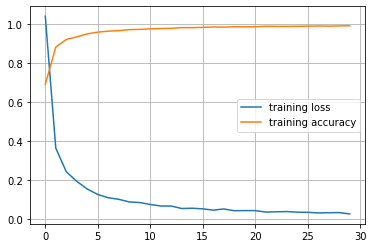

In [12]:
#train_visualization
plt.plot(accident_model.history['loss'], label = 'training loss')
plt.plot(accident_model.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

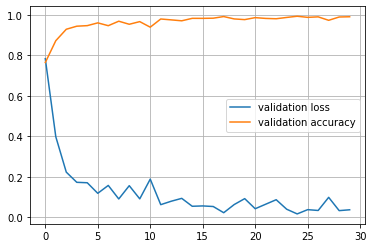

In [13]:
#vaild_visualization
plt.plot(accident_model.history['val_loss'], label = 'validation loss')
plt.plot(accident_model.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [15]:
#predicate
score = model.evaluate(test_generator, steps=24,verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

24/24 [==============================] - 2s 83ms/step - loss: 0.0236 - accuracy: 0.9922
Test score: 0.02355217933654785
Test accuracy: 0.9921875
